In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib as mpl
import datetime

In [173]:
df = pd.read_csv("https://projects.fivethirtyeight.com/polls/data/president_primary_polls.csv")

In [174]:
df = df[(df['party'] == 'DEM') & (df['candidate_name'] == 'Robert F. Kennedy')]


In [175]:
grade_to_score = {
    "A+": 1,
    "A": 0.95,
    "A-": 0.9,
    "B+": 0.85,
    "B": 0.8,
    "B-": 0.75,
    "C+": 0.7,
    "C": 0.65,
    "C-": 0.6,
    "D+": 0.55,
    "D": 0.5,
    "D-": 0.45,
    "F": 0.1
}
grade_to_score["A/B"] = (grade_to_score["A"] + grade_to_score["B"]) / 2
grade_to_score["B/C"] = (grade_to_score["B"] + grade_to_score["C"]) / 2
grade_to_score["C/D"] = (grade_to_score["C"] + grade_to_score["D"]) / 2
grade_to_score["D/F"] = (grade_to_score["D"] + grade_to_score["F"]) / 2

In [176]:
cmap = plt.get_cmap("Blues")
bounds = sorted(grade_to_score.values())
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [177]:
df['pollster_score'] = df['fte_grade'].map(grade_to_score)

In [178]:
#sorted(df['fte_grade'].unique(), key=lambda letter_grade: grade_to_score[letter_grade], reverse)

/var/folders/8q/911ddsf164j4ddftj0q7sx_c0000gn/T/ipykernel_61226/2156251065.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(df['end_date'])
/var/folders/8q/911ddsf164j4ddftj0q7sx_c0000gn/T/ipykernel_61226/2156251065.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))


Text(0, -0.15, 'Will Bradley 2023')

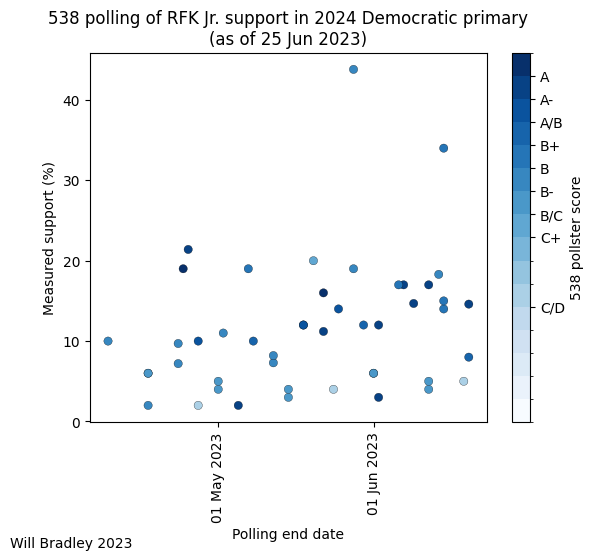

In [179]:
fig, ax = plt.subplots()

dates = pd.to_datetime(df['end_date'])
ax.scatter(dates, df['pct'], c=df['pollster_score'], cmap=cmap, norm=norm, lw=0.2, ec='black')
ax.set_xticks(dates, labels=dates, rotation='vertical')

months = mdate.MonthLocator(interval=1)
months_fmt = mdate.DateFormatter('%d %b %Y')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)


cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
grade_ticks_to_display = sorted(df['pollster_score'].unique())
cb.ax.set_yticks(grade_ticks_to_display)
cb.ax.set_yticklabels(sorted(df['fte_grade'].unique(), key=lambda letter_grade: grade_to_score[letter_grade]))
cb.ax.set_ylabel("538 pollster score")


ax.set_xlabel("Polling end date")
ax.set_ylabel("Measured support (%)")

current_date = datetime.date.today()
ax.set_title(f"538 polling of RFK Jr. support in 2024 Democratic primary\n(as of {current_date.strftime('%d %b %Y')})")

fig.text(0, -0.15, f"Will Bradley {current_date.year}")

In [183]:
fig.savefig("plot.png", bbox_inches="tight", dpi=700)